### 📊Data Visualization Results
#### -> check this for [Z-score](../data/reports/figures/z_score.png)
#### -> check this for [Low Hazard Toxins](../data/reports/figures/low_hazard_toxins.png)
#### -> check this for [Moderate Hazard Toxins](../data/reports/figures/mod_hazard_toxins.png)
#### -> check this for [High Hazard Toxins](../data/reports/figures/high_hazard_toxins.png)
#### -> check this for [All Toxins](../data/reports/figures/all_toxins.png)

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import scipy as sp

In [105]:
df = pd.read_csv('../data/processed/cleaned_data.csv')
df.head(5)

,Label,Brand,Name,Price,Rank,Ingredients
0,3.0,64.0,Crème de la Mer,175.0,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
1,3.0,95.0,Facial Treatment Essence,179.0,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle..."
2,3.0,29.0,Protini™ Polypeptide Cream,68.0,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary..."
3,3.0,64.0,The Moisturizing Soft Cream,175.0,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P..."
4,3.0,49.0,Your Skin But Better™ CC+™ Cream with SPF 50+,38.0,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet..."


## Styling the graphs 
* used fonts:
* imported fonts from HTML5 library
* colorized graphs based on this palette: 


### Importing extra fonts and utilizing local fonts for the styling of graphs

# Check the variedness of the dataset
## -> Calculate the Z score 

### Rank & Price
1. Calculate the Z score using pandas

### Brand
1. Turn the brands column into a list
2. Assign an ID to the unique brands in the brand column
3. Change the dataframe to show the IDs instead of the Brand names
4. Calculate the Z score of the Brands list using pandas

### KDE
**A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram.**

In [106]:
#calculating the z-score for price, rank, & brand category


print('Z-Score Maxes & Mins' + '\n')

# print("Price (Min): " + price_min_z_score)
# print("Price (Max): " + price_max_z_score)
# print("Rank (Min): " + rank_min_z_score)
# print("Rank (Max): " + rank_max_z_score)
# print("Brand (Min): " + brand_min_z_score)
# print("Brand (Max): " + brand_max_z_score)



Z-Score Maxes & Mins



Using downloaded fonts:

useful links:
[https://www.python-graph-gallery.com/custom-fonts-in-matplotlib](https://www.python-graph-gallery.com/custom-fonts-in-matplotlib)

Redaction

In [107]:

import matplotlib
import matplotlib.pyplot as plt
font_paths = {
    "Redaction": '../src/fonts/redaction-cufonfonts/Redaction-mL8P5.otf',
    "Redaction_Italics" : '../src/fonts/redaction-cufonfonts/Redaction50Italic-2ODWo.otf',
    "Redaction_Bold" : '../src/fonts/redaction-cufonfonts/Redaction50Bold-vmXRL.otf',
    "Redaction_Blur": "../src/fonts/redaction-cufonfonts/Redaction50-8Mg4n.otf",
    "Playfair_Display" : '../src/fonts/PlayfairDisplay-Regular.ttf'
}

def get_font_prop(font_name):
    font_path = font_paths[font_name]
    return matplotlib.font_manager.FontProperties(fname=font_path)

/var/folders/mw/fc5wj4ns76x4xcwycqk0_bt00000gn/T/ipykernel_51327/2739245133.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), size=25, fontproperties=get_font_prop('Redaction'))
/var/folders/mw/fc5wj4ns76x4xcwycqk0_bt00000gn/T/ipykernel_51327/2739245133.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), size=25, fontproperties=get_font_prop('Redaction'))


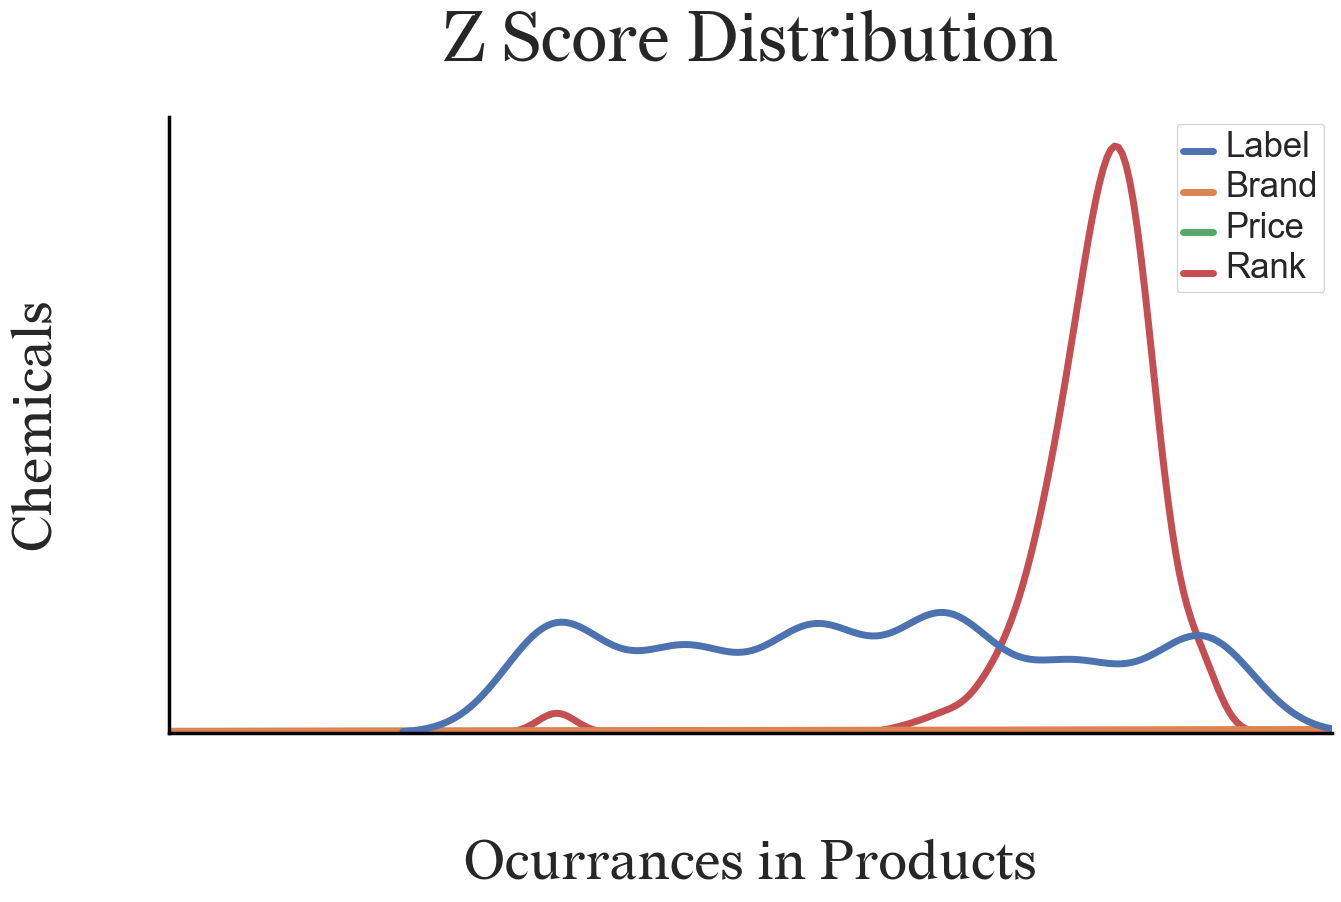

In [108]:
# counts1 = df['Price'] = (df['Price'] - df['Price'].mean()) / df["Price"].std()
# counts2  = df['Rank'] =(df['Rank'] - df['Rank'].mean()) / df["Rank"].std()
# counts3 = df['Brand'] =(df['Brand'] - df['Brand'].mean()) / df["Brand"].std()

price_min_z_score = df.min(axis=0)['Price']
price_max_z_score = df.max(axis=0)['Price']

rank_min_z_score = df.min(axis=0)['Rank']
rank_max_z_score = df.max(axis=0)['Rank']

brand_min_z_score = df.min(axis=0)['Brand']
brand_max_z_score = df.max(axis=0)['Brand'] 

sns.set(rc={'axes.facecolor':'#FFFFFF', 'figure.facecolor':'#FFFFFF'})

ax = sns.kdeplot(
    data=df,
    linewidth = 5)

ax.set_title("Z-Score of Rank, Price, & Brand", size= 50)

ax.set_xlabel("Z-Score", size = 25)
# ax.set_xticklabels(rotation=90, size = 20)

ax.set_ylabel("Density", size = 25)
#ax.set_yticklabels(ax.get_yticklabels(), size=20)
ax.set_title('Z Score Distribution', fontproperties=get_font_prop('Redaction'), pad=40, fontsize = 50)

#change to the y yaxis
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

sns.set(rc={'figure.figsize':(10,8)})   
           
ax.set_xlabel("Ocurrances in Products", fontproperties=get_font_prop('Redaction'), labelpad=40, fontsize=40)
ax.set_xlim(-3, 6)
ax.set_xticklabels(ax.get_xticklabels(), size=25, fontproperties=get_font_prop('Redaction'))

ax.set_ylabel("Chemicals", fontproperties=get_font_prop('Redaction'), labelpad=40, fontsize=40)
ax.set_yticklabels(ax.get_yticklabels(), size=25, fontproperties=get_font_prop('Redaction'))
#plt.text(50, 1, 'allergens, harmful to the environment, cause irritation', fontdict = opt_font)

#styling the spines
for spine in ['bottom', 'left']:
    ax.spines[spine].set_color('0')
    ax.spines[spine].set_linewidth(2.5)

ax.grid(False)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

ax.tick_params(axis='y', labelsize=30, pad=30)
ax.tick_params(axis='x', labelsize=30, pad=30)


plt.setp(ax.get_legend().get_texts(), fontsize='25') 
plt.setp(ax.get_legend().get_title(), fontsize='20')

plt.savefig("../reports/figures/z_score.png", bbox_inches='tight') 

## Finding the toxin occurrences in the ingredents

In [109]:
# print('Low Hazard:')

low_list = [('ethanolamine_occ', 'Ethanolamine'), 
            ('oxybenzone_occ', 'Oxybenzone'), 
            ('resorcinol_occ', 'Resorcinol'), 
            ('formaldehyde_occ', 'Formaldehyde'), 
            ('diethanolamine_occ', 'Diethanol'),
            ('silanes_occ', 'Silane'),
            ('octinaxate_occ', 'Octinaxate')]

# make an array that stores the occurances later for dataframe creation
low_occurrences_list = []
# make an array that stores the toxin names later for dataframe creation
low_hazard_list = []
# Iterate over the list and create the variables dynamically
for var, search_str in low_list:
    # Create the variable with the specified name and value
    globals()[var] = df[df['Ingredients'].str.contains(search_str)]
    
    low_occurrences = len(globals()[var])
    # appends each occurance to the array
    low_occurrences_list.append(low_occurrences)
    # appends each toxin name to the array
    low_hazard_list.append(search_str)
    # Calculate the number of occurrences using the len function
    low_occurrences = len(globals()[var])
    # Print the number of occurrences
    print(f"{search_str}:  {low_occurrences}.")

    
print('\n')

# print('Moderate Hazard:')

mod_list = [('parfum_occ', 'Parfum'),
            ('fragrance_occ', 'Fragrance'),
            ('triclosan_occ', 'Triclosan'), 
            ('octinoxates_occ', 'Octinoxate'), 
            ('homosalate_occ', 'Homosalate'), 
            ('teflon_occ', 'Teflon')]

mod_occurrences_list = []
mod_hazard_list = []

for var, search_str in mod_list:
    globals()[var] = df[df['Ingredients'].str.contains(search_str)]
    mod_occurrences = len(globals()[var])
    mod_occurrences_list.append(mod_occurrences)
    mod_hazard_list.append(search_str)
    print(f"{search_str}:  {mod_occurrences}.")
    

print('\n')

high_list = [('talc_occ', 'Talc'),
             ('parabens_occ', 'Parabens'),
             ('glycol_occ', 'Glycols')]

high_occurrences_list = []
high_hazard_list = []

for var, search_str in high_list:
    globals()[var] = df[df['Ingredients'].str.contains(search_str)]
    high_occurrences = len(globals()[var])
    high_occurrences_list.append(high_occurrences)
    high_hazard_list.append(search_str)
    print(f"{search_str}:  {high_occurrences}.")
    
toxin_name_list =[]
toxin_occ_list = []

#adding the names the seperate lists to the major list
toxin_name_list.extend(low_hazard_list + mod_hazard_list + high_hazard_list)

#adding the occurances the seperate lists to the major list
toxin_occ_list.extend(low_hazard_list + mod_hazard_list + high_hazard_list)


toxins_df = pd.DataFrame({
        'Toxin': toxin_name_list,
        'Toxin Occurance': toxin_occ_list
})

#adding a toxicity column
# toxins_df = toxins_df.iloc[0:len(low_list)].assign(Toxicity="Low")
# toxins_df = toxins_df.iloc[8:14].assign(Toxicity="Moderate")
# toxins_df = toxins_df.iloc[15:17].assign(Toxicity="High")

toxins_df.head(17)

# toxins_df.to_csv('../data/interim/toxin.csv')

Ethanolamine:  0.
Oxybenzone:  12.
Resorcinol:  1.
Formaldehyde:  0.
Diethanol:  0.
Silane:  49.
Octinaxate:  0.


Parfum:  131.
Fragrance:  499.
Triclosan:  1.
Octinoxate:  22.
Homosalate:  17.
Teflon:  0.


Talc:  29.
Parabens:  0.
Glycols:  0.


,Toxin,Toxin Occurance
0,Ethanolamine,Ethanolamine
1,Oxybenzone,Oxybenzone
2,Resorcinol,Resorcinol
3,Formaldehyde,Formaldehyde
4,Diethanol,Diethanol
5,Silane,Silane
6,Octinaxate,Octinaxate
7,Parfum,Parfum
8,Fragrance,Fragrance
9,Triclosan,Triclosan


## Creating a new DataFrame from the cell output

In [110]:
#creating a list of all of the toxins and their occurrences
toxin_name_list =[]
toxin_occ_list = []

#adding the names the seperate lists to the major list
toxin_name_list.extend(low_hazard_list + mod_hazard_list + high_hazard_list)

#adding the occurances the seperate lists to the major list
toxin_occ_list.extend(low_hazard_list + mod_hazard_list + high_hazard_list)

print(toxin_name_list)

toxins_df = pd.DataFrame({
        'Toxin': toxin_name_list,
        'Toxin Occurance': toxin_occ_list
})


#adding a toxicity column
toxins_df = toxins_df.iloc[0:7].assign(Toxicity="Low")
toxins_df = toxins_df.iloc[8:14].assign(Toxicity="Moderate")
toxins_df = toxins_df.iloc[15:17].assign(Toxicity="High")

toxins_df.info()
toxins_df.head(5)

['Ethanolamine', 'Oxybenzone', 'Resorcinol', 'Formaldehyde', 'Diethanol', 'Silane', 'Octinaxate', 'Parfum', 'Fragrance', 'Triclosan', 'Octinoxate', 'Homosalate', 'Teflon', 'Talc', 'Parabens', 'Glycols']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Toxin            0 non-null      object
 1   Toxin Occurance  0 non-null      object
 2   Toxicity         0 non-null      object
dtypes: object(3)
memory usage: 132.0+ bytes


,Toxin,Toxin Occurance,Toxicity


### Seperate Data frames for each toxicity

In [111]:
dfs = {
    'low_df': (low_hazard_list, low_occurrences_list),
    'mod_df': (mod_hazard_list, mod_occurrences_list),
    'high_df': (high_hazard_list, high_occurrences_list)
}

for df_name, (hazard_list, occurrences_list) in dfs.items():
    df = pd.DataFrame({
        'Toxin': hazard_list,
        'Occurances': occurrences_list
    })
    globals()[df_name] = df

low_df.head()

,Toxin,Occurances
0,Ethanolamine,0
1,Oxybenzone,12
2,Resorcinol,1
3,Formaldehyde,0
4,Diethanol,0


## Plotting the low hazard chemicals

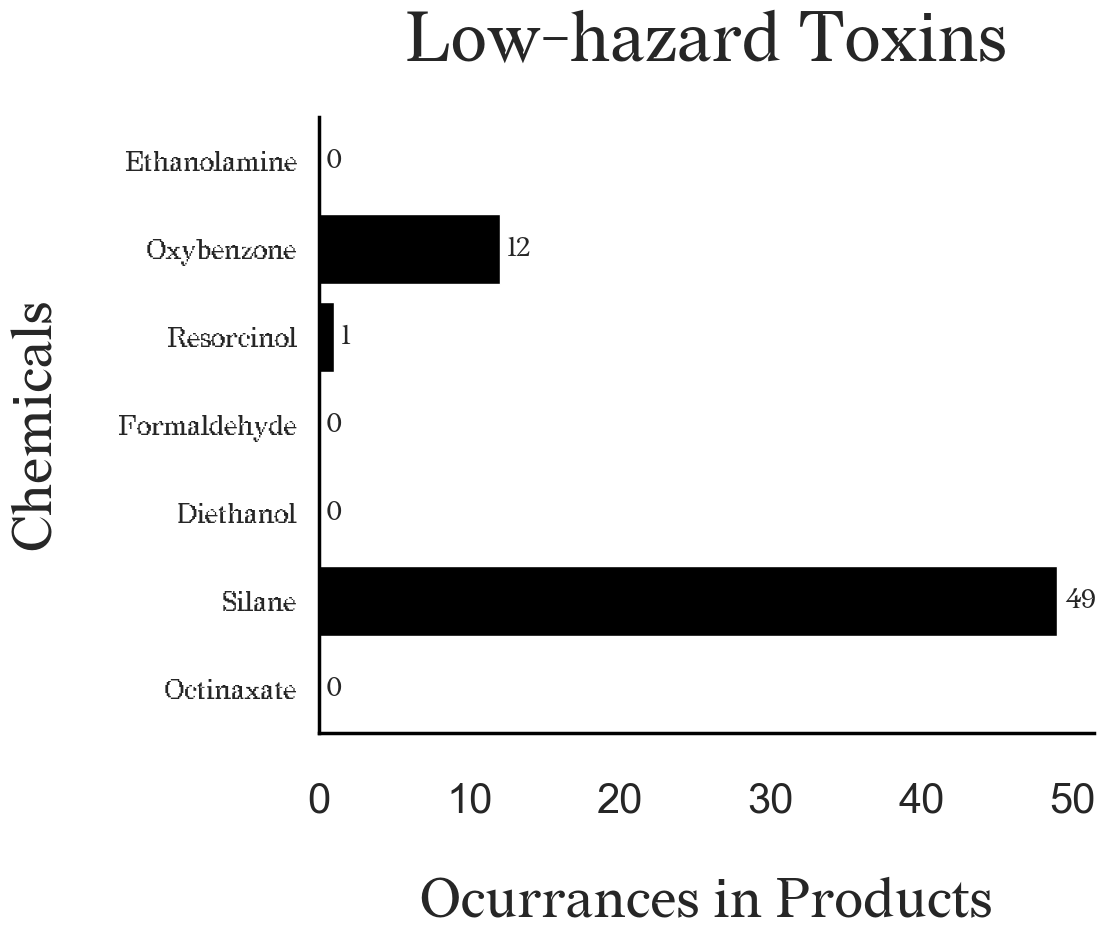

In [112]:
sns.set(rc={'axes.facecolor':'#FFFFFF', 'figure.facecolor':'#FFFFFF'})
ax = sns.barplot(x= low_df['Occurances'], 
                y=low_df['Toxin'], 
                data=low_df,
                color='#000000',
                )

ax.set_title('Low-hazard Toxins', fontproperties=get_font_prop('Redaction'), pad=40, fontsize=50)

tick_spacing = 10
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

sns.set(rc={'figure.figsize':(10,10)})              
ax.set_xlabel("Ocurrances in Products", fontproperties=get_font_prop('Redaction'), labelpad=40, fontsize= 40)
# ax.set_xticklabels(ax.get_xticklabels(), size =20)

ax.set_ylabel("Chemicals", fontproperties=get_font_prop('Redaction'),fontsize = 40, labelpad=40)
ax.set_yticklabels(ax.get_yticklabels(), size=25, fontproperties=get_font_prop('Redaction_Blur'))
#plt.text(50, 1, 'allergens, harmful to the environment, cause irritation', fontdict = opt_font)

ax.bar_label(ax.containers[0], size = 20, padding= 5, fontproperties=get_font_prop('Redaction')) # shows the number of exact occurances on each bar

#styling the spines
for spine in ['bottom', 'left']:
    ax.spines[spine].set_color('0')
    ax.spines[spine].set_linewidth(2.5)
# Turns off grid on the left Axis.

# Turns off grid on the secondary (right) Axis.
ax.xaxis.grid(False)
ax.yaxis.grid(True)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

ax.tick_params(axis='y', labelsize=20, pad=10)
ax.tick_params(axis='x', labelsize=30, pad=30)

# ax.grid(b=True, which='major', color='black', linewidth=0.2)
plt.savefig("../reports/figures/low_hazard_toxins.png", bbox_inches='tight') 

## Plotting the moderate-hazard chemcials

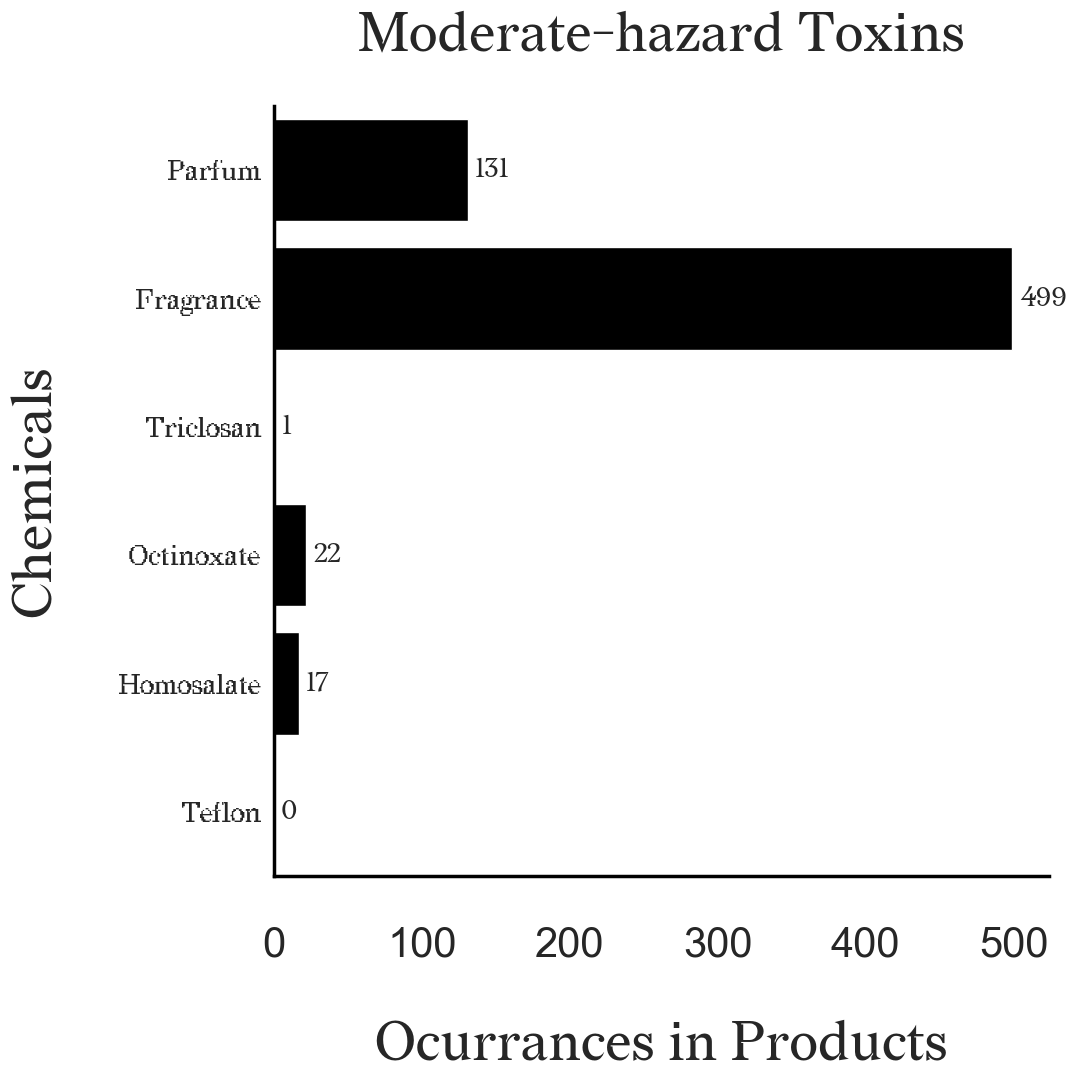

In [113]:
sns.set(rc={'axes.facecolor':'#FFFFFF', 'figure.facecolor':'#FFFFFF'})

ax = sns.barplot(x= mod_df['Occurances'], 
                y=mod_df['Toxin'], 
                data=low_df,
                color='#000000',
                )

ax.set_title('Moderate-hazard Toxins', fontproperties=get_font_prop('Redaction'), pad=40, fontsize=40)

tick_spacing = 100
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

sns.set(rc={'figure.figsize':(10,10)})              
ax.set_xlabel("Ocurrances in Products", fontproperties=get_font_prop('Redaction'), labelpad=40, fontsize=40)
# ax.set_xticklabels(ax.get_xticklabels(), size =20, fontproperties=get_font_prop('Redaction'))

ax.set_ylabel("Chemicals", fontproperties=get_font_prop('Redaction'), labelpad=40, fontsize=40)
ax.set_yticklabels(ax.get_yticklabels(), size=25, fontproperties=get_font_prop('Redaction_Blur'))
#plt.text(50, 1, 'allergens, harmful to the environment, cause irritation', fontdict = opt_font)

ax.bar_label(ax.containers[0], size = 20, padding= 5, fontproperties=get_font_prop('Redaction')) # shows the number of exact occurances on each bar

#styling the spines
for spine in ['bottom', 'left']:
    ax.spines[spine].set_color('0')
    ax.spines[spine].set_linewidth(2.5)

ax.grid(False)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=30, pad=30)

plt.savefig("../reports/figures/moderate_hazard_toxins.png", bbox_inches='tight') 

## Plotting the high-hazard chemcials

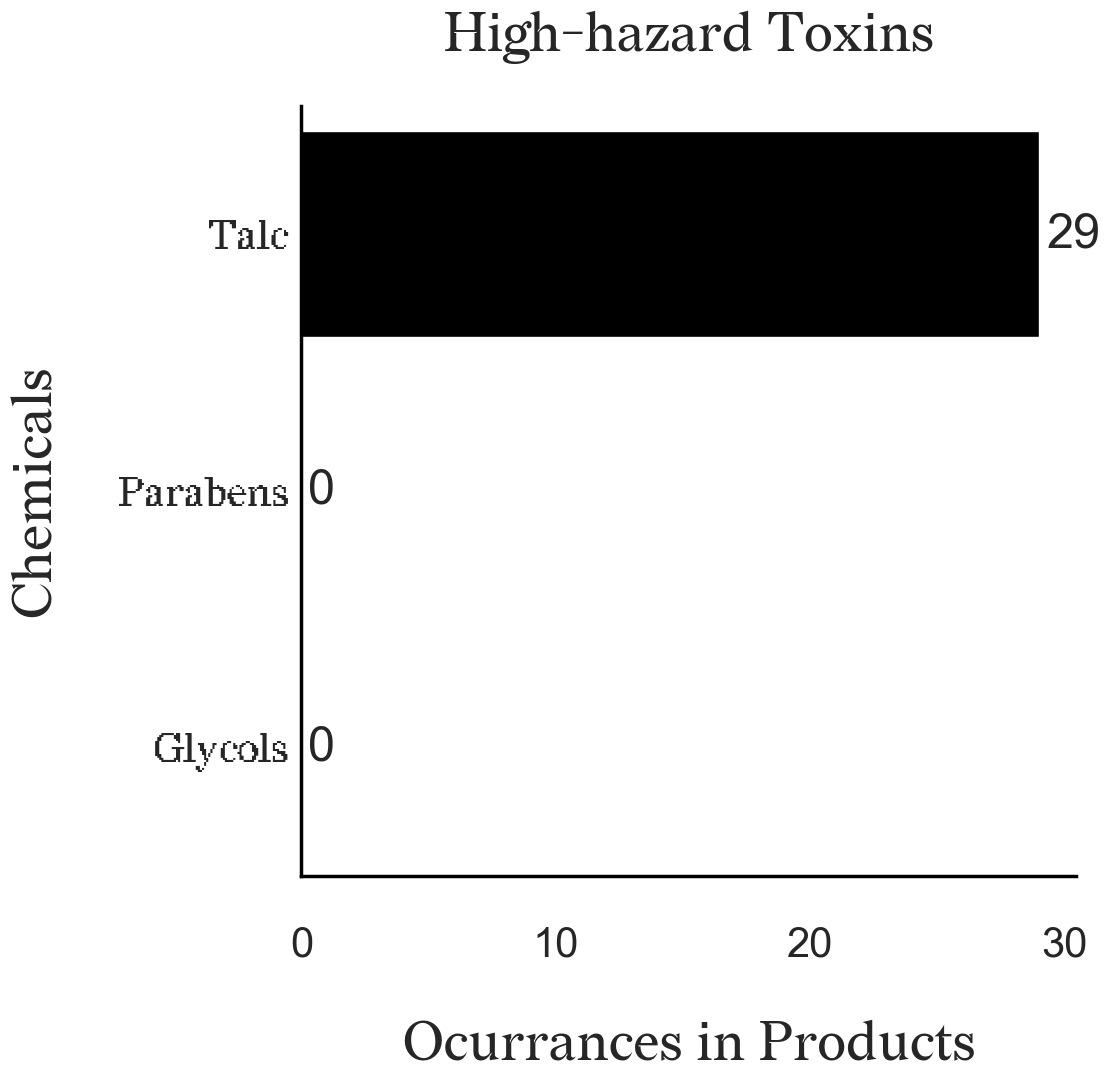

In [114]:
sns.set(rc={'axes.facecolor':'#FFFFFF', 'figure.facecolor':'#FFFFFF'})

ax = sns.barplot(x= high_df['Occurances'], 
                y=high_df['Toxin'], 
                data=high_df,
                color='#000000',
                )

ax.set_title('High-hazard Toxins', fontproperties=get_font_prop('Redaction'), pad=40, fontsize=40)

tick_spacing = 10
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

sns.set(rc={'figure.figsize':(15,8)})              
ax.set_xlabel("Ocurrances in Products", fontproperties=get_font_prop('Redaction'), fontsize=40, labelpad=40)
# ax.set_xticklabels(ax.get_xticklabels(), size =20)

ax.set_ylabel("Chemicals", fontproperties=get_font_prop('Redaction'), labelpad=40, fontsize =40)
ax.set_yticklabels(ax.get_yticklabels(), size=25, fontproperties=get_font_prop('Redaction_Blur'))
#plt.text(50, 1, 'allergens, harmful to the environment, cause irritation', fontdict = opt_font)

ax.bar_label(ax.containers[0], size = 35, padding= 5) # shows the number of exact occurances on each bar

#styling the spines
for spine in ['bottom', 'left']:
    ax.spines[spine].set_color('0')
    ax.spines[spine].set_linewidth(2.5)

ax.grid(False)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis='x', labelsize=30, pad=30)

plt.savefig("../reports/figures/high_hazard_toxins.png", bbox_inches='tight') 

/var/folders/mw/fc5wj4ns76x4xcwycqk0_bt00000gn/T/ipykernel_51327/2407723256.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), size = 12)
/var/folders/mw/fc5wj4ns76x4xcwycqk0_bt00000gn/T/ipykernel_51327/2407723256.py:40: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='black', linewidth=0.2)


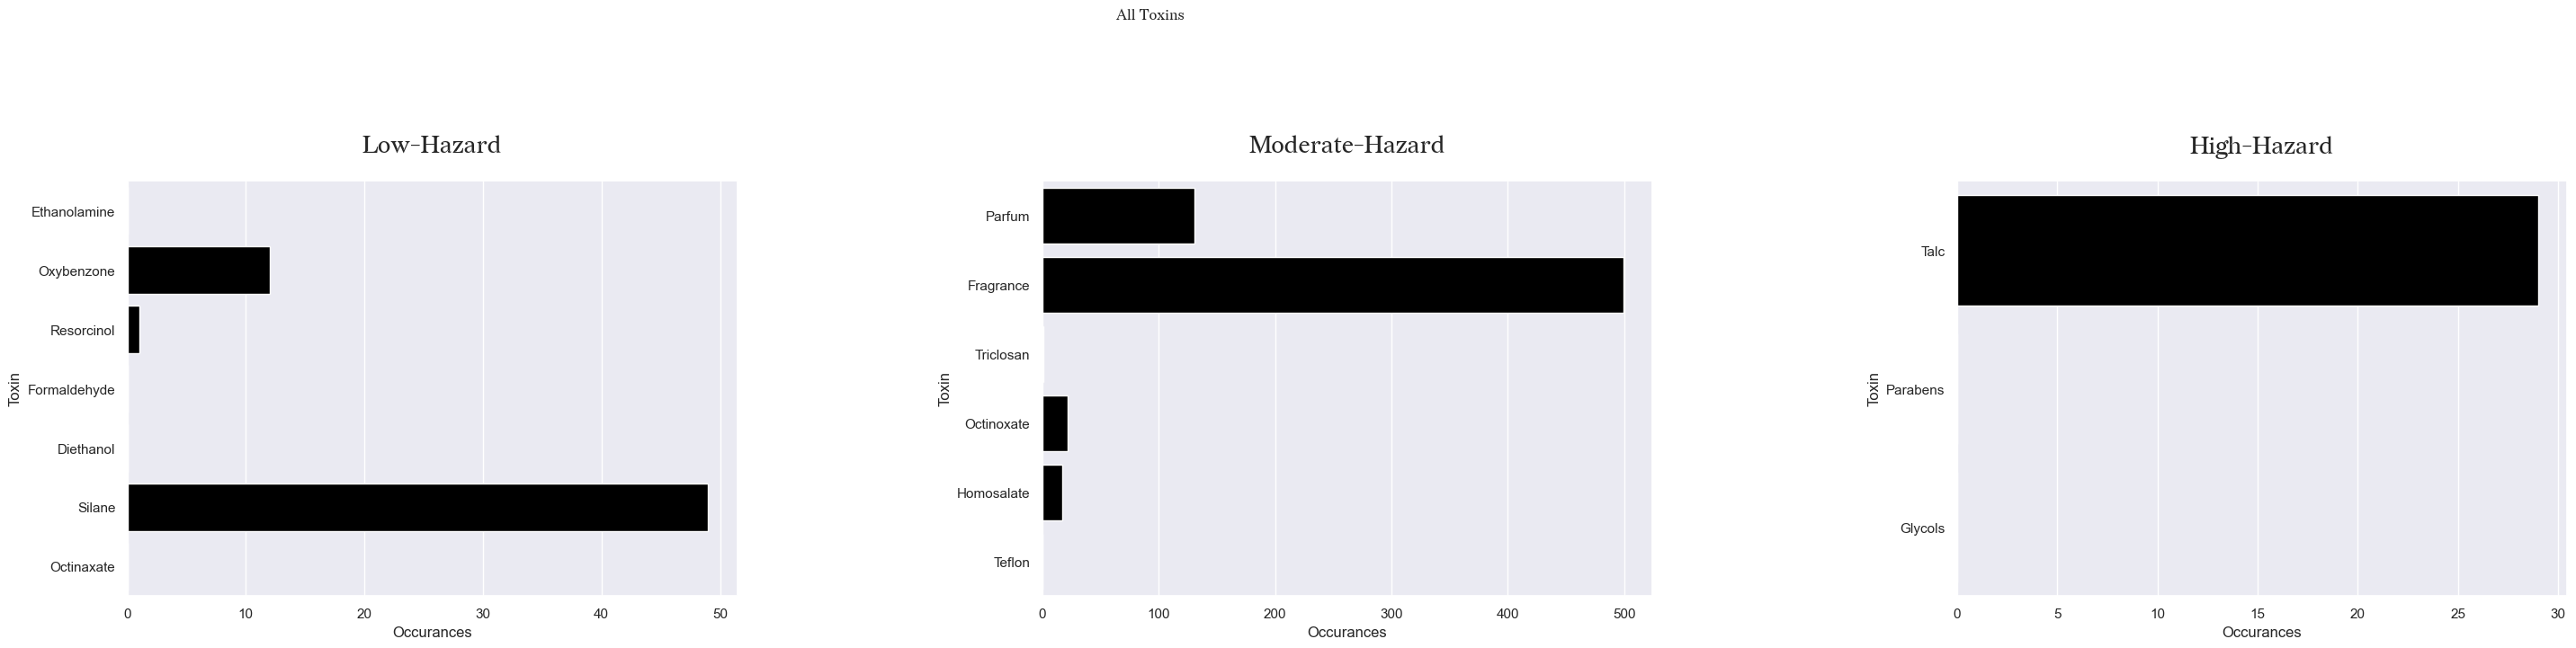

In [115]:
fig,axs = plt.subplots(ncols = 3, figsize=(35,6))
sns.set(rc={'axes.facecolor':'#FFFFFF', 'figure.facecolor':'#FFFFFF'})

#refactor into a loop?
sns.barplot(x= low_df['Occurances'], 
                y=low_df['Toxin'], 
                data=low_df,
                color='#000000',
                ax=axs[0]
                )

sns.barplot(x= mod_df['Occurances'], 
                y=mod_df['Toxin'], 
                data=mod_df,
                color='#000000',
                ax=axs[1]
                )

sns.barplot(x= high_df['Occurances'], 
                y=high_df['Toxin'], 
                data=high_df,
                color='#000000',
                ax=axs[2]
                )

ax.set_xlabel("Occurances", fontproperties=get_font_prop('Redaction'))
ax.set_xticklabels(ax.get_xticklabels(), size = 12)

ax.set_ylabel("Toxin",fontproperties=get_font_prop('Redaction'))
ax.set_yticklabels(ax.get_yticklabels(), size=12)

fig.suptitle('All Toxins', fontproperties=get_font_prop('Redaction'), y=1.2, x=.45)

fig.subplots_adjust(hspace=5, wspace=0.5)

axs[0].set_title('Low-Hazard', y=1.05, fontproperties=get_font_prop('Redaction'), fontsize = 20)
axs[1].set_title('Moderate-Hazard', y=1.05, fontproperties=get_font_prop('Redaction'), fontsize = 20)
axs[2].set_title('High-Hazard', y=1.05, fontproperties=get_font_prop('Redaction'), fontsize = 20)

ax.grid(b=True, which='major', color='black', linewidth=0.2)

plt.savefig("../reports/figures/all_toxins.png") 

---

## Price vs. Cost - Linear Regression Model

AttributeError: 'PathCollection' object has no property 'scatter_kws'

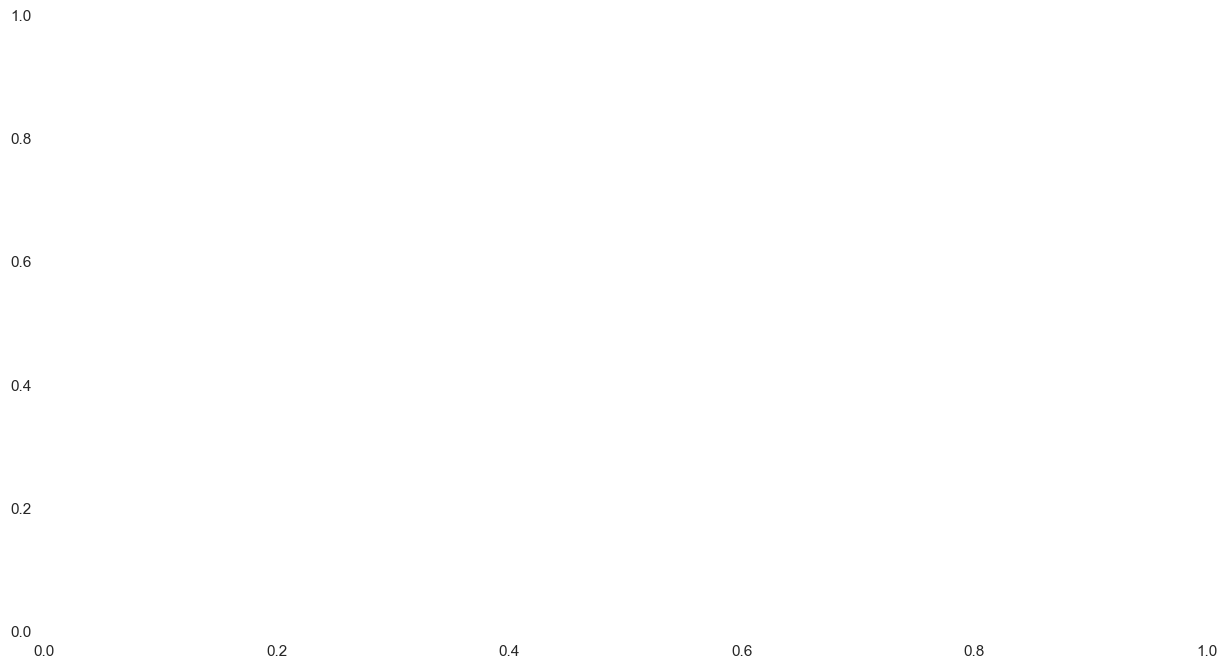

In [118]:
# price_list=df['Price'].tolist()
# rating_list=df['Rank'].tolist()

main_df = pd.read_csv('../data/processed/cleaned_data.csv')

sns.set(rc={'axes.facecolor':'#FFFFFF', 'figure.facecolor':'#FFFFFF'})


ax = sns.scatterplot(
    x=main_df['Price'],
    y=main_df['Rank'],
    color='#484041',
    scatter_kws={'s':20}
)

sns.set(rc={'figure.figsize':(16,8)}) 

ax.set_xlabel("Price ($)", fontproperties=get_font_prop('Redaction'), fontsize = 20)
# ax.set_xticklabels(ax.get_xticklabels(), size = 12)

ax.set_ylabel("Rating (0 to 5)", fontproperties=get_font_prop('Redaction'), fontsize = 20)

ax.set_xlim(0, 370)

ax.set_title('Price vs. Rating', fontproperties=get_font_prop('Redaction'), fontsize = 20)

plt.savefig("../reports/figures/price_vs_rating.png") 

## Brand vs. Rank

In [120]:
brand_list=main_df['Brand'].tolist()
rating_list=main_df['Rank'].tolist()

sns.set(font_scale = 3)
sns.color_palette("hls", 8)

#plt.figure(figsize=(400,10))
sns.set(rc={'figure.figsize':(40,8.27)})
ax.set_xlabel("Price", fontproperties=get_font_prop('Redaction'), fontsize = 20)
ax.set_xticklabels(ax.get_xticklabels(), size = 12, rotation = 90)

ax.set_ylabel("Rating (0 to 5)", fontproperties=get_font_prop('Redaction'), fontsize = 20)
ax.set_yticklabels(ax.get_yticklabels(), size=12)
#plt.text(5, 1, 'carcinogens & mutagens', fontdict = opt_font)

#ax.set(xlabel="Ocurrances in Products", ylabel= "Chemcials")

ax.set_title('Price vs. Rating', fontproperties=get_font_prop('Redaction'), fontsize = 20)

plt.show()

plt.savefig("../reports/figures/price_vs_rating_violinplot.png") 

/var/folders/mw/fc5wj4ns76x4xcwycqk0_bt00000gn/T/ipykernel_51327/345571299.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), size = 12, rotation = 90)


<Figure size 4000x827 with 0 Axes>

## Brand with the most toxins

In [ ]:
#going back to reading the cleaned data since the data column were set to the caluclate and display the z-score


: 

: 